# GraphSAGE w/ PyTorch & random graphs

In [1]:
import sage
import utils
import torch
import matplotlib.pyplot as plt

from torch import nn
from torch import Tensor
from typing import List

In [2]:
torch.manual_seed(1635227865558)

### Generate a random graph

In [3]:
num_nodes = 16
edges = utils.gen_edges(num_nodes)

print(f"nodes: {num_nodes} {list(range(num_nodes))}")
print(f"edges: {len(edges)} {edges}")

nodes: 16 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
edges: 22 [(0, 12), (1, 9), (1, 11), (2, 1), (3, 14), (4, 9), (4, 0), (5, 3), (5, 2), (6, 11), (6, 1), (7, 10), (7, 13), (8, 1), (9, 7), (10, 1), (11, 0), (12, 5), (13, 10), (13, 10), (14, 0), (15, 7)]


In [4]:
adj = utils.make_adj_mat(num_nodes, edges)
print(f"adjacency: {adj.shape}")
print(adj)

adjacency: torch.Size([16, 16])
tensor([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      

In [5]:
points = torch.rand(num_nodes, 2)
print(f"points: {points.shape}")
print(points)

points: torch.Size([16, 2])
tensor([[0.2157, 0.4048],
        [0.9150, 0.4711],
        [0.1265, 0.4409],
        [0.7018, 0.1399],
        [0.3596, 0.4339],
        [0.1796, 0.9548],
        [0.2784, 0.6056],
        [0.7971, 0.2749],
        [0.4293, 0.8307],
        [0.0587, 0.6168],
        [0.6371, 0.3583],
        [0.5272, 0.0444],
        [0.0529, 0.3752],
        [0.3563, 0.0583],
        [0.3038, 0.8180],
        [0.9739, 0.9861]])


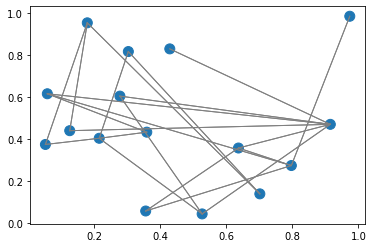

In [6]:
utils.plot_graph(adj, points)

### Explore GraphSAGE

In [7]:
features = torch.eye(num_nodes)
graph = sage.Graph(edges, features)
print(f"num_nodes: {graph.num_nodes}")
print(f"num_feats: {graph.dim_feats}")

num_nodes: 16
num_feats: 16


In [8]:
dim_embeds = 6
model = sage.GraphSage(graph.dim_feats, dim_embeds)
model

GraphSage(
  (layers): Sequential(
    (0): SageLayer(
      (weights): Linear(in_features=32, out_features=6, bias=False)
      (aggregator): MaxPoolAggregator(
        (weights): Linear(in_features=16, out_features=16, bias=True)
      )
    )
    (1): SageLayer(
      (weights): Linear(in_features=12, out_features=6, bias=False)
      (aggregator): MaxPoolAggregator(
        (weights): Linear(in_features=6, out_features=6, bias=True)
      )
    )
  )
)

In [9]:
# generated node representations
embeds = model(graph)
print(f"embeds: {embeds.shape}")
print(embeds)

embeds: torch.Size([16, 6])
tensor([[ 0.4130, -0.1408,  0.4494,  0.4747, -0.5123, -0.3463],
        [ 0.1283,  0.3135,  0.6596,  0.2089, -0.0959, -0.6304],
        [-0.5577,  0.5300,  0.1054, -0.6140,  0.0428,  0.1345],
        [-0.3425,  0.3225, -0.4956, -0.6990, -0.2106,  0.0103],
        [ 0.4985, -0.0850, -0.0435,  0.4486, -0.4899, -0.5488],
        [ 0.0394,  0.4650,  0.7114, -0.0892, -0.0115, -0.5177],
        [-0.2402, -0.0307, -0.7847, -0.4064, -0.0165,  0.4002],
        [ 0.1738,  0.5508,  0.2252, -0.3195,  0.5306, -0.4817],
        [-0.2502,  0.6654, -0.3724, -0.1955, -0.3094, -0.4711],
        [-0.2921,  0.3158, -0.6056, -0.6288,  0.2046,  0.1041],
        [ 0.6599, -0.5518,  0.1209,  0.2500, -0.3974,  0.1579],
        [ 0.7080, -0.5130, -0.0765,  0.1845, -0.4408,  0.0376],
        [-0.3001,  0.5005, -0.4297, -0.6682, -0.1471, -0.0818],
        [ 0.4102,  0.2775,  0.0255,  0.0295, -0.1464, -0.8554],
        [ 0.0935,  0.0714, -0.8232, -0.2176, -0.5071, -0.0624],
        [-0.

### Try supervised training

In [10]:
num_classes = 3
labels = torch.randint(0, num_classes, (num_nodes,))

print(f"labels: {labels.shape}")
print(labels)

labels: torch.Size([16])
tensor([2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 1])


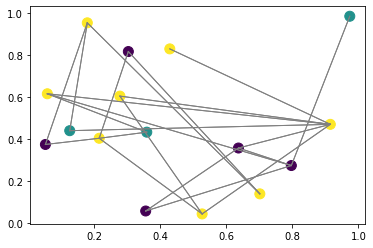

In [11]:
utils.plot_graph(adj, points, colors=labels)

In [12]:
batch_size = num_nodes
learning_rate = 0.01
epochs = 200

In [13]:
features = torch.eye(num_nodes)
graph = sage.Graph(edges, features)
model = sage.GraphSage(graph.dim_feats, num_classes)

In [14]:
xentropy = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [15]:
for i in range(epochs):
    print(f"Epoch {i+1:<3} ------")
    sage.train(model, graph, labels, xentropy, optimizer)
    sage.evaluate(model, graph, labels)
    print()
print("done")

Epoch 1   ------
loss: 1.315206
accuracy: 37.5%

Epoch 2   ------
loss: 1.193493
accuracy: 43.8%

Epoch 3   ------
loss: 1.127289
accuracy: 50.0%

Epoch 4   ------
loss: 1.054932
accuracy: 62.5%

Epoch 5   ------
loss: 0.986769
accuracy: 62.5%

Epoch 6   ------
loss: 0.930970
accuracy: 62.5%

Epoch 7   ------
loss: 0.884484
accuracy: 62.5%

Epoch 8   ------
loss: 0.840262
accuracy: 68.8%

Epoch 9   ------
loss: 0.807635
accuracy: 68.8%

Epoch 10  ------
loss: 0.770414
accuracy: 68.8%

Epoch 11  ------
loss: 0.746591
accuracy: 68.8%

Epoch 12  ------
loss: 0.729251
accuracy: 75.0%

Epoch 13  ------
loss: 0.712976
accuracy: 75.0%

Epoch 14  ------
loss: 0.701089
accuracy: 75.0%

Epoch 15  ------
loss: 0.690928
accuracy: 81.2%

Epoch 16  ------
loss: 0.679438
accuracy: 81.2%

Epoch 17  ------
loss: 0.663256
accuracy: 81.2%

Epoch 18  ------
loss: 0.651665
accuracy: 81.2%

Epoch 19  ------
loss: 0.641608
accuracy: 81.2%

Epoch 20  ------
loss: 0.630955
accuracy: 81.2%

Epoch 21  ------
los

### Visualize

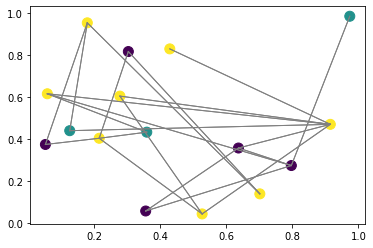

In [16]:
embeds = model(graph)
softmax = nn.Softmax(dim=1)
y_pred = softmax(embeds).argmax(dim=1)
utils.plot_graph(adj, points, colors=y_pred)

### Try new nodes

In [18]:
node_feats = torch.zeros(1, graph.dim_feats)
node_point = torch.rand(1, 2)
node_idx = graph.num_nodes

new_edges = list(edges)
for neighbor in torch.randint(num_nodes, (3,)):
    new_edges.append((node_idx, neighbor))
new_adj = utils.make_adj_mat(num_nodes + 1, new_edges)

new_points = torch.cat([points, node_point], dim=0)
new_feats = torch.cat([features, node_feats], dim=0)

In [19]:
new_graph = sage.Graph(new_edges, new_feats)

In [20]:
embeds = model(new_graph)
new_embed = embeds[-1,:]
print(f"new_embed: {new_embed.shape}")
print(new_embed)

new_embed: torch.Size([3])
tensor([ 0.1307, -0.7495,  0.6490], grad_fn=<SliceBackward>)


In [21]:
y_pred = softmax(embeds).argmax(dim=1)
new_label = y_pred[-1]
print(f"new_predicted_label: {new_label}")

new_predicted_label: 2


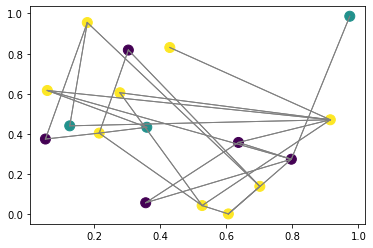

In [22]:
utils.plot_graph(new_adj, new_points, colors=y_pred)